## DTW score

In [1]:
import numpy as np

def dtw_score(s, t):
    n, m = len(s), len(t)
    
    dtw = np.ones((n+1, m+1)) * np.inf
    dtw[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            dtw[i, j] = cost + np.min([
                dtw[i-1, j],    # insertion
                dtw[i, j-1],    # deletion
                dtw[i-1, j-1]   # match
            ])
    
    # dtw[i,j] is the distance between s[1:i] and t[1:j] with the best alignment
    return dtw[n, m]

In [2]:
from fastdtw import fastdtw

a = np.random.uniform(size=10)
b = np.random.uniform(size=15)

# Custom
print("Custom:", dtw_score(a, b))

# Fastdtw
distance, path = fastdtw(a, b)
print("Fastdtw:", distance)

Custom: 2.4065438683547518
Fastdtw: 2.4065438683547518


## DTW clustering without representatives

In [3]:
def gen_test_data():
    data = np.concatenate((
            np.random.normal((-2, -2), size=(200, 2)),
            np.random.normal((2, 2), size=(200, 2)),
            np.random.normal((-4, 4), size=(200, 2))
        ))
    np.random.shuffle(data)

    return data

In [4]:
from random import choice
import matplotlib.pyplot as plt

X = gen_test_data()

# Assign clusters randomly
nb_clust = 3
y = np.asarray([choice(range(nb_clust)) for _ in range(X.shape[0])])

In [5]:
old_y = y.copy()
N = X.shape[0]

dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        dist_matrix[i, j] = dtw_score(X[i], X[j])

while True:
    for i in range(N):
        curr_clust = y[i]
        best_clust = curr_clust
        best_score = np.inf

        for c in range(nb_clust):
            clust_idxs = np.where(y == c)[0]
            score = sum([dist_matrix[i, j] for j in clust_idxs]) / len(clust_idxs[clust_idxs != i])
            
            if score < best_score:
                best_score = score
                best_clust = c
        
        y[i] = best_clust
    
    if (y == old_y).all():
        break
    old_y = y.copy()

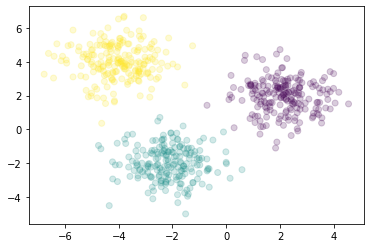

In [6]:
plt.scatter(X[:,0], X[:,1], alpha=0.2, c=y)

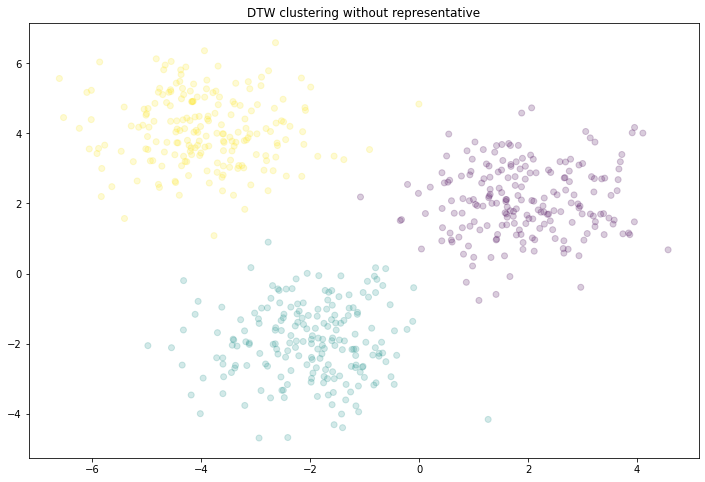

In [7]:
from matplotlib import animation


X = gen_test_data()
N = X.shape[0]

dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        dist_matrix[i, j] = dtw_score(X[i], X[j])

fig = plt.figure(figsize=(12, 8))
plt.title("DTW clustering without representative")

scatter = plt.scatter(X[:,0], X[:,1], alpha=0.2, c=y)


def animate(i):
    if i >= 600:
        i -= 600
    
    curr_clust = y[i]
    best_clust = curr_clust
    best_score = np.inf

    for c in range(nb_clust):
        clust_idxs = np.where(y == c)[0]
        score = sum([dist_matrix[i, j] for j in clust_idxs]) / len(clust_idxs[clust_idxs != i])
        
        if score < best_score:
            best_score = score
            best_clust = c
    
    y[i] = best_clust
    scatter.set_array(y)

    return scatter,

anim = animation.FuncAnimation(fig, animate, frames=int(X.shape[0] * 1.3), interval=10, blit=True)
anim.save("images/dtw_anim.mp4")